# NLP Demo Logistic Regression

In [1]:
import pandas as pd

In [2]:
filepath_dict = {
    'yelp': 'data/yelp_labelled.txt',
    'amazon': 'data/amazon_cells_labelled.txt',
    'imdb': 'data/imdb_labelled.txt'
}

df_list = []

for source, filepath in filepath_dict.items():
  df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
  df['source'] = source
  df_list.append(df)

df = pd.concat(df_list)

df.head()

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


## Logistic Regression

In [3]:
df_yelp = df[df['source'] == 'yelp']

sentences = df_yelp['sentence'].values
labels = df_yelp['label'].values

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.25, random_state=1000)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

CountVectorizer()

In [8]:
X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [10]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

In [11]:
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

In [12]:
print(sentences_train[2])
print(X_train[2])

Of all the dishes, the salmon was the best, but all were great.
[11, 43, 1, 171, 1, 283, 3, 1, 47, 26, 43, 24, 22]


In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
X_train = pad_sequences(X_train, padding='post', maxlen=100)
X_test = pad_sequences(X_test, padding='post', maxlen=100)

In [15]:
print(sentences_train[2])
print(X_train[2])

Of all the dishes, the salmon was the best, but all were great.
[ 11  43   1 171   1 283   3   1  47  26  43  24  22   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [16]:
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers

In [17]:
model = models.Sequential()
model.add(
    layers.Embedding(
        input_dim=len(tokenizer.word_index) + 1, 
        output_dim=50, 
        input_length=100
    )
)
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [19]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=10)

Epoch 1/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4693 - val_loss: 0.6932 - val_accuracy: 0.4800
Epoch 2/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5067 - val_loss: 0.6933 - val_accuracy: 0.4800
Epoch 3/20
75/75 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.4800
Epoch 4/20
75/75 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5067 - val_loss: 0.6933 - val_accuracy: 0.4800
Epoch 5/20
75/75 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5067 - val_loss: 0.6934 - val_accuracy: 0.4800
Epoch 6/20
75/75 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5067 - val_loss: 0.6934 - val_accuracy: 0.4800
Epoch 7/20
75/75 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5067 - val_loss: 0.6934 - val_accuracy: 0.4800
Epoch 8/20
75/75 [==

In [20]:
_, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {train_accuracy:.4f}')
_, test_accuracy = model.evaluate(X_test, y_test)
print(f'Testing Accuracy: {test_accuracy:.4f}')

24/24 [==============================] - 0s 701us/step - loss: 0.6931 - accuracy: 0.5067
Training Accuracy: 0.5067
8/8 [==============================] - 0s 754us/step - loss: 0.6937 - accuracy: 0.4800
Testing Accuracy: 0.4800


In [21]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [22]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

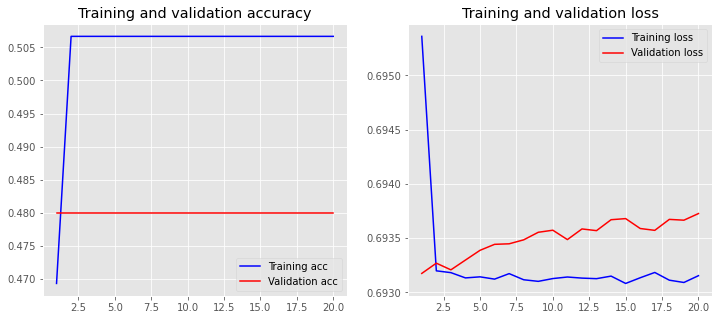

In [23]:
plot_history(history)